In [1]:
import ee, geemap,datetime
from geeS2downloader import GEES2Downloader
import geopandas as gpd
import fiona
import pandas as pd
from scripts.get_raster_data import SEN2_downloader
from tqdm import tqdm
import os
%load_ext autoreload
%autoreload 2



In [2]:
#ee.Authenticate()
ee.Initialize()


In [3]:
for layername in fiona.listlayers('data/vector_data_stavropol.gpkg'):
    with fiona.open('data/vector_data_stavropol.gpkg', layer=layername) as src:
        print(layername, len(src))

region_boundary 1
disctrict_boundary 26
settlements 520
rivers_line 3045
water_poly 4158
agriculture 15294
buffered_areas_for_clit_utm37 0
buffered_for_clip 15
layer_styles 1


<AxesSubplot:>

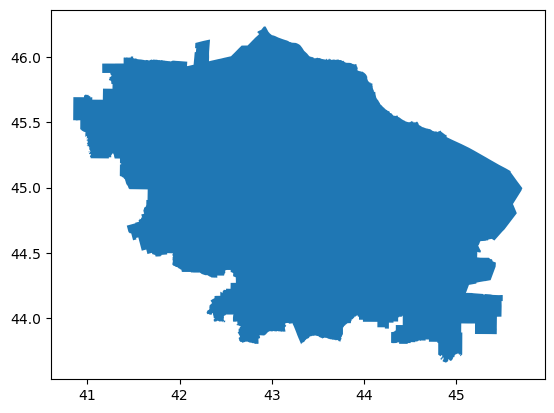

In [4]:
region_boundary = gpd.read_file('data/vector_data_stavropol.gpkg', layer='region_boundary')
region_boundary.plot()

<AxesSubplot:>

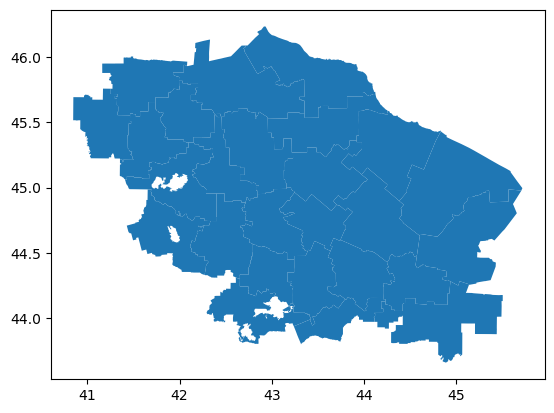

In [5]:
disctrict_boundary = gpd.read_file('data/vector_data_stavropol.gpkg', layer='disctrict_boundary')
disctrict_boundary.plot()

In [6]:
disctrict_boundary['district_name'] = disctrict_boundary.NAME_EN.str.split(expand=True)[0]

In [7]:
district_names = disctrict_boundary.district_name.unique()

In [8]:
district_names

array(['Georgiyevsky', 'Mineralovodsky', 'Novoselitsky', 'Sovetsky',
       'Levokumsky', 'Neftecumsky', 'Blagodarnensky', 'Andropovsky',
       'Alexandrovsky', 'Budyonnovsky', 'Shpakovsky', 'Predgorny',
       'Turkmensky', 'Krasnogvardeysky', 'Trunovsky', 'Apanasenkovsky',
       'Arzgirsky', 'Kochubeyevsky', 'Stepnovsky', 'Petrovsky',
       'Grachyovsky', 'Izobilnensky', 'Novoalexandrovsky', 'Kirovsky',
       'Ipatovsky', 'Kursky'], dtype=object)

In [9]:
for district in tqdm(district_names):

    if os.path.isfile(f'./data/row_rasters/{district}.tif'):
        print('file exists')
    else: 
        print('stand by...')
        geometry = disctrict_boundary[disctrict_boundary['district_name'] == district]
        get_data = SEN2_downloader('2022', geometry)
        get_data.get_collection()
        geemap.download_ee_image(get_data.rgb_nir, f'./data/row_rasters/{district}.tif', region = geemap.geopandas_to_ee(geometry).geometry())
        print('скачивание закончено ')


        

  0%|          | 0/26 [00:00<?, ?it/s]

file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
stand by...


Consider adjusting `region`, `scale` and/or `dtype` to reduce the Budyonnovsky.tif download size (raw: 1.96 GB).


Budyonnovsky.tif: |          | 0.00/1.96G (raw) [  0.0%] in 00:00 (eta:     ?)

There is no STAC entry for: None      
100%|██████████| 26/26 [04:04<00:00,  9.40s/it]

скачивание закончено 
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
